In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import re
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("review_data.csv")
df.head(20)

,score,review,y
0,5.0,명불허전,1
1,5.0,"이거슨 한국의 까르보나라,,,🤍 들깨칼국수 고소하니 넘 맛나유 얼큰해물칼국수는 해물...",1
2,5.0,들깨가 찐하고 고소해요. 음식맛이 깔끔해요. 어르신 모시고 청주 온다면 식사하기 괜...,1
3,4.0,청주 사람들 점심엔 여기만 오나봐요. 주말 점심시간에 왔는데 손님 100명은 앉아있...,1
4,5.0,NaN,1
5,5.0,NaN,1
6,5.0,4명에서 3~4인 셋트시키면 진짜 배터지게 먹고나올수있어요!,1
7,5.0,들깨칼국수 땡기면 찾아가는곳,1
8,5.0,일하시는분들이 친절하고 음식이 들깨칼국수 맛있어요,1
9,3.0,NaN,0


In [3]:
def text_cleaning(text):
    # 정규표현식으로 한글만 추출
        hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
        result = hangul.sub('', text)
        return result

In [4]:
df = pd.read_csv("review_data.csv")
row = []
for i in df['review']:
    row.append(text_cleaning(str(i)))

df['ko_text'] = row
del df['review']

# 한 글자 이상의 텍스트를 가지고 있는 데이터만 추출
df = df[df['ko_text'].str.len() > 0]
df.tail(5)

,score,y,ko_text
456,5.0,1,새우튀김 우동 처음 먹어봤는데 진짜 맛있어요충대 주변 돈까스집 다 먹어봤는데 양이나...
457,5.0,1,점심식사로 추천합니다 진짜 일식 돈까스중에서는최곱니다
458,5.0,1,충북대학교 맛집양꼬치 맛집이내요 몸에좋고 보양식이예요
459,5.0,1,맛있게 잘 먹었습니다
460,5.0,1,세트 먹었는데 푸짐하고 넘 맛있어요 명이서 먹을 양


In [5]:
########################### 여기서부터 자연어처리를 위한 과정 ###########################

In [6]:
from konlpy.tag import Okt

# konlpy라이브러리로 텍스트 데이터에서 형태소를 추출합니다.
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

# 형태소 추출 동작을 테스트합니다.
result = get_pos(df['ko_text'].values[1])
print(result)

['이거슨/Noun', '한국/Noun', '의/Josa', '까르보나라/Noun', '들깨/Noun', '칼국수/Noun', '고소하니/Adjective', '넘/Verb', '맛/Noun', '나유/Noun', '얼큰해/Adjective', '물/Noun', '칼국수/Noun', '는/Josa', '해물/Noun', '도/Josa', '많이/Adverb', '들어있고/Verb', '약간/Noun', '짬뽕/Noun', '느낌/Noun', '해물파전/Noun', '도/Josa', '괜춘스/Noun', '가족/Noun', '들/Suffix', '과/Josa', '외식/Noun', '하기/Verb', '좋숩니/Noun', '다/Josa']


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].tolist())

In [8]:
X.shape

(358, 2871)

In [9]:
print(str(index_vectorizer.vocabulary_)[:100]+"..")

{'명불허전/Noun': 998, '이거슨/Noun': 1988, '한국/Noun': 2743, '의/Josa': 1980, '까르보나라/Noun': 353, '들깨/Noun': ..


In [10]:
print(df['ko_text'].values[1])
print(X[1])

이거슨 한국의 까르보나라 들깨칼국수 고소하니 넘 맛나유 얼큰해물칼국수는 해물도 많이 들어있고 약간 짬뽕 느낌 해물파전도 괜춘스 가족들과 외식하기 좋숩니다
  (0, 1988)	1
  (0, 2743)	1
  (0, 1980)	1
  (0, 353)	1
  (0, 712)	1
  (0, 2536)	2
  (0, 199)	1
  (0, 480)	1
  (0, 888)	1
  (0, 439)	1
  (0, 1755)	1
  (0, 1060)	1
  (0, 518)	1
  (0, 2779)	1
  (0, 635)	2
  (0, 879)	1
  (0, 727)	1
  (0, 1715)	1
  (0, 2391)	1
  (0, 517)	1
  (0, 2780)	1
  (0, 238)	1
  (0, 70)	1
  (0, 710)	1
  (0, 223)	1
  (0, 1913)	1
  (0, 2689)	1
  (0, 2269)	1
  (0, 532)	1


In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

print(X.shape)
print(X[1])

(358, 2871)
  (0, 2780)	0.18832867801369899
  (0, 2779)	0.18832867801369899
  (0, 2743)	0.21207596318922514
  (0, 2689)	0.16458139283817283
  (0, 2536)	0.29589570220642225
  (0, 2391)	0.19818469186761092
  (0, 2269)	0.21207596318922514
  (0, 1988)	0.21207596318922514
  (0, 1980)	0.13679885019494434
  (0, 1913)	0.21207596318922514
  (0, 1755)	0.21207596318922514
  (0, 1715)	0.21207596318922514
  (0, 1060)	0.19818469186761092
  (0, 888)	0.08569461903629025
  (0, 879)	0.13679885019494434
  (0, 727)	0.21207596318922514
  (0, 712)	0.15069012151655858
  (0, 710)	0.11401670181537596
  (0, 635)	0.1648585672903216
  (0, 532)	0.17443740669208477
  (0, 518)	0.10248913251871337
  (0, 517)	0.15069012151655858
  (0, 480)	0.16915619044173236
  (0, 439)	0.21207596318922514
  (0, 353)	0.21207596318922514
  (0, 238)	0.21207596318922514
  (0, 223)	0.14540890526620617
  (0, 199)	0.19818469186761092
  (0, 70)	0.16054613537047052


In [12]:
from sklearn.model_selection import train_test_split

y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)

(286, 2871)
(72, 2871)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test,y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

accuracy: 0.76
Precision: 0.761
Recall: 1.000
F1: 0.864


In [14]:
from sklearn.metrics import confusion_matrix

confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 1 17]
 [ 0 54]]


In [15]:
# y가 0과 1을 각각 얼마나 가지고 있는지를 출력
df['y'].value_counts()

y
1    241
0    117
Name: count, dtype: int64

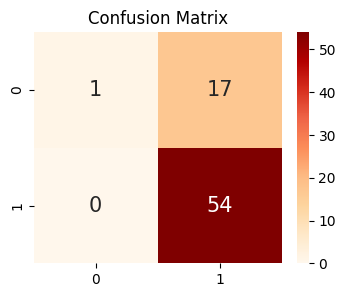

In [17]:
# 오차행렬
import seaborn as sns
confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()